# **PROJECT : PREDICTION HEART DISEASES BY CRISP-DM (Cross-Industry Standard Process for Data Mining)** 

## **ÉTAPE 1 : Business Understanding**

L'Hôpital Saint-Pierre souhaite développer un modèle supervié de Machine Learning pour identifier par la méthode de classification les patients à haut risque de maladie cardiaque. L'objectif est de :
- Réduire les faux négatifs (FN) : Ne pas détecter un malade coûte 50 000€.
- Minimiser les faux positifs (FP) : Diagnostiquer à tort coûte 10 000€.
- Optimiser les vrais positifs (VP) : Un bon diagnostic génère un bénéfice de 30 000€.
Le modèle doit donc permettre d'équilibrer la réduction des coûts tout en maximisant les bénéfices nets pour l'État; le modèle devra donc faire un bénéfice sur les 50 000 euros et les 10.000 euros.

## **ÉTAPE 2 : Data Understanding**

### **A- CALLING PAGKAGES**

In [127]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   --------------- ------------------------ 204.8/545.2 kB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 522.2/545.2 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [138]:
#Bibliothèques pour analyses de données
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Bibliothèques pour TEST Statistiques
from scipy import stats
import warnings

# Bibliothèques pour implémentation du modèle ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score, matthews_corrcoef, roc_auc_score,confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Bibliothèques pour voir l'importance des variables dans un modèle
import shap
from yellowbrick.model_selection import FeatureImportances


# Ignorer les warnings
warnings.filterwarnings('ignore')

### **B- OPENING DATASET**

In [59]:
#Importation de la base de données et affichage des premières lignes
df = pd.read_csv("D:/Users/Sanpsy/Desktop/Aloyas files/Project Classify Heart disease/HeartDiseaseUCI.csv", sep=',',low_memory=False)
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [60]:
# Affichage des dimensions de la base de données
df.shape

(303, 15)

**Interprètation** :
**Notre dataset nous donne 303 personnes malades ou patients avec 15 variables dont notre outcome**

In [61]:
# Affichage des variables de la base de données
for col in df.columns:
    print(col)

Unnamed: 0
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num


**Interprètation : Nous avons 15 variables décrites ci - dessous**

In [62]:
# Afficher les valeurs uniques pour chaque colonne
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Valeurs uniques dans la colonne '{col}': {unique_values}")

Valeurs uniques dans la colonne 'Unnamed: 0': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 

### **1- VARIABLES DESCRIPTION**

 **1.Unnamed** :  Colonne d’index souvent créée automatiquement lors de l’export

 **2. age** : Âge du patient (en années)

**3. sex** : Sexe biologique du patient (1 = Homme et 0 = Femme)

**4. cp** [chest pain type] :  Type de douleur thoracique (1 = Angine typique, 2 = Angine atypique, 3 = Douleur non angineuse, 4 = Asymptomatique)

**5. trestbps** [resting blood pressure] : Pression artérielle au repos (en mm Hg).

**6. chol** [serum cholesterol] : Taux de cholestérol sérique (en mg/dl).

**7. fbs** [fasting blood sugar > 120 mg/dl] : Glycémie à jeun > 120 mg/dl ? 1 = Oui, 0 = Non

**8. restecg** [resting electrocardiographic results] : Résultat de l’électrocardiogramme au repos. 0 = Normal, 1 = Anomalie de l’onde ST-T (inversion ou élévation > 0.05 mV), 2 = Hypertrophie ventriculaire gauche probable ou certaine

**9. thalach** [maximum heart rate achieved] : Fréquence cardiaque maximale atteinte.

**10. exang** [exercise-induced angina] : Angine induite par l’exercice ? 1 = Oui, 0 = Non

**11. oldpeak** : Dépression du segment ST induite par l’exercice par rapport au repos (en mm).

**12. slope** [slope of the peak exercise ST segment] :  Pente du segment ST pendant l’effort.1 = Montante, 2 = Plate, 3 = Descendante

**13. ca** [number of major vessels] : Nombre de vaisseaux majeurs colorés par fluoroscopie (0 à 3).

**14. thal** Résultat du test thalassemia. 3 = Normal, 6 = Défaut fixe, 7 = Défaut réversible

**15. num (target or OUTCOME) Présence de maladie cardiaque**. 0 = Pas de maladie, 1, 2, 3, 4 = Degré de maladie (de 1 à 4) 0 → Absence de maladie
1-4 → Présence de maladie.















**Notre target ou outcome est la variable num qui décrit la présence da la maladie cardiaque ou pas. DONC Y= 0 (absence de maladie cardiaque) et Y= 1 (Présence de maladie cardiaque)**

### **2- DISTRIBUTION AND RELATIONS BETWEEN VARIABLES**

In [63]:
#Affichage des types de données de chaque colonne.
df.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
num             int64
dtype: object

**Interprètation** :
**Notre dataset a majoritairement ses valeurs en int64 ce qui est crucial pour l'utilisation pour  l'implémentations de nos modèles dd Machine Learning**

In [64]:
# Supprimer la colonne Unnamed: 
df.drop(columns=['Unnamed: 0'], inplace=True)
# Redéfinir l'index de pandas avec une série claire : patients
df.index.name = 'patients'


**Interprètation** :
**La colonne **Unnamed: 0** est une colonne d’index souvent créée automatiquement lors de l’export donc nous l'avons supprimé et renommé la colonne des index en patients pour une meilleure compréhension**

In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
patients,,,,,,,,,,,,,,
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [66]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [67]:
df['age'].value_counts

<bound method IndexOpsMixin.value_counts of patients
0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64>

**Interprètation : Le patient le plus moins âgé a 29ans et le plus âgé a 77ans. L’âge moyen des patients de notre dataset est de 56 ans. C’est un âge relativement jeune dans le contexte des maladies cardiovasculaires qui augmentent fortement après 60-65 ans donc notre dataset se concentre probablement sur des cas précoces ou intermédiaires de maladie cardiaque, ce qui est cohérent avec le fait que les hommes sont souvent touchés plus tôt que les femmes.Donc environ 68% des patients ont entre 47 et 65 ans si c'est une distribution normale**

In [68]:
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

**Interprètation: Nous voyons dans notre dataset que plus des 2/3 de nos patients sont des hommes ce qui peut être compréhensif car selon les études les hommes sont plus souvent touchés que les femmes, Les hommes ont un risque plus élevé de développer une maladie cardiaque**

In [69]:
df['cp'].value_counts()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64

**Interprètation : La douleur thoracique asymptomatique (valeur 4) est la plus fréquente, représentant une large part des cas. Les types de douleurs plus typiques (valeurs 1 et 2) sont plus rares, en particulier l’angine typique (valeur 1) qui n’apparaît que dans 23 cas. La moyenne de 3,15 indique une tendance vers des douleurs moins spécifiques ou silencieuses. Cela suggère que beaucoup de patients ne présentent pas les signes classiques d’une maladie cardiaque, ce qui peut compliquer le diagnostic. Avec un écart-type de 0,96, environ 68 % des patients ont un type de douleur codé entre 2,2 et 4,1, donc majoritairement des douleurs non typiques à asymptomatiques. Ce profil est cohérent avec des formes précoces ou atypiques de maladies cardiaques.**

In [70]:
df['trestbps'].value_counts()

trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
158     1
104     1
174     1
117     1
164     1
Name: count, dtype: int64

**Interprétation : La pression artérielle au repos la plus fréquente est autour de 120-140 mmHg, ce qui correspond à une pression normale haute à légèrement élevée. La moyenne de 131,68 mmHg suggère une tendance générale vers une pression légèrement supérieure à la normale. L’écart-type de 17,6 indique une certaine variabilité : environ 68 % des patients ont une pression entre 114 et 149 mmHg. Cela reflète un profil de patients souvent en pré-hypertension ou hypertension légère, ce qui est cohérent avec un risque accru de maladies cardiovasculaires. Les cas extrêmes restent rares (ex : 100 ou 170 mmHg).**

In [71]:
df['chol'].value_counts()

chol
204    6
197    6
234    6
269    5
212    5
      ..
340    1
160    1
394    1
184    1
131    1
Name: count, Length: 152, dtype: int64

**Interprétation : Le taux moyen de cholestérol est de 246,69 mg/dl, ce qui est supérieur à la limite recommandée (< 200 mg/dl pour un cholestérol normal). L’écart-type de 51,77 montre une dispersion notable : environ 68 % des patients ont un cholestérol compris entre 195 mg/dl et 298 mg/dl. Cela suggère que la majorité des patients présente une hypercholestérolémie modérée à sévère, ce qui est cohérent avec un risque accru de maladies cardiaques. Les valeurs extrêmes (ex : 394 mg/dl) restent peu fréquentes.**

In [72]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [73]:
df['restecg'].value_counts()

restecg
0    151
2    148
1      4
Name: count, dtype: int64

In [74]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
150     7
       ..
177     1
127     1
97      1
190     1
90      1
Name: count, Length: 91, dtype: int64

In [75]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [76]:
df['oldpeak'].value_counts()

oldpeak
0.0    99
1.2    17
0.6    14
1.0    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
1.5     5
3.6     4
2.2     4
3.4     3
0.9     3
2.4     3
0.3     3
4.0     3
1.1     2
4.2     2
2.3     2
2.5     2
3.2     2
5.6     1
2.9     1
6.2     1
2.1     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: count, dtype: int64

In [77]:
df['slope'].value_counts()



slope
1    142
2    140
3     21
Name: count, dtype: int64

In [78]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [79]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [80]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [81]:
# Analyse des corrélations avec la variable cible 'num'

# 1. Calculer la matrice de corrélation (variables numériques uniquement)
cor_matrix = df.corr(numeric_only=True)

# 2. Extraire et trier les corrélations par rapport à la cible 'num'
cor_with_target = cor_matrix['num'].sort_values(ascending=False)

# 3. Afficher les corrélations triées
print("\nCorrélation avec la variable cible 'num' :")
print(cor_with_target)



Corrélation avec la variable cible 'num' :
num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64


**Rappel** : **num est notre Outcome**, indiquant la présence de maladie cardiaque (0 = pas de maladie, 1 à 4 = présence de maladie).

Une corrélation positive → plus la variable augmente, plus le risque de maladie augmente.

Une corrélation négative → plus la variable augmente, plus le risque de maladie diminue.

**1. thalach** (corrélation = -0.415) Maximum heart rate achieved (fréquence cardiaque maximale atteinte pendant l'effort)

Corrélation négative modérée → plus un individu atteint une fréquence cardiaque élevée, moins il est probable qu’il ait une maladie cardiaque.

**Interprétation : Les patients avec une faible fréquence cardiaque maximale sont plus à risque**.

**2. ca** (corrélation = 0.519) Nombre de vaisseaux majeurs colorés par fluoroscopie (0 à 3)

Corrélation positive forte → plus il y a de vaisseaux obstrués ou visibles à l’examen, plus le risque de maladie cardiaque est élevé.

**Interprétation : C’est un excellent prédicteur de la maladie cardiaque dans ton dataset**.

**3. thal** (corrélation = 0.510) Résultat du test thalassemia (3 = normal, 6 = défaut fixe, 7 = défaut réversible)

Corrélation positive modérée forte.

**Interprétation : Les anomalies au test thal sont fortement associées à une maladie cardiaque**.

**4. oldpeak** (corrélation = 0.504) Dépression du segment ST induite par l’exercice par rapport au repos

Corrélation positive modérée forte.

**Interprétation : Un oldpeak élevé est un indicateur fort de stress cardiaque anormal, donc de maladie**.

### **3- VISUALISATION UNIVARIEE DES DONNEES**

In [82]:
# Variables continues
num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Variables catégorielles
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

# 1. Statistiques descriptives pour les variables continues
num_desc = df[num_vars].describe().T[['mean', 'std']]
num_desc['count'] = df[num_vars].count()
num_desc = num_desc.rename(columns={
    'mean': 'Mean',
    'std': 'Std',
    'count': 'N'
})

# 2. Effectifs et pourcentages pour les variables catégorielles
cat_summary = []

for var in cat_vars:
    counts = df[var].value_counts(dropna=False).sort_index()
    percents = (counts / len(df) * 100).round(2)
    for cat in counts.index:
        cat_summary.append({
            'Variable': var,
            'Modalité': cat,
            'N': counts[cat],
            '%': percents[cat]
        })

cat_desc = pd.DataFrame(cat_summary)

# 3. Affichage final
print("🔹 Variables continues : Moyenne, Écart-type, N")
display(num_desc)

print("\n🔸 Variables catégorielles : Effectifs et Pourcentages")
display(cat_desc)

🔹 Variables continues : Moyenne, Écart-type, N


,Mean,Std,N
age,54.438944,9.038662,303
trestbps,131.689769,17.599748,303
chol,246.693069,51.776918,303
thalach,149.607261,22.875003,303
oldpeak,1.039604,1.161075,303



🔸 Variables catégorielles : Effectifs et Pourcentages


,Variable,Modalité,N,%
0,sex,0.0,97,32.01
1,sex,1.0,206,67.99
2,cp,1.0,23,7.59
3,cp,2.0,50,16.50
4,cp,3.0,86,28.38
5,cp,4.0,144,47.52
6,fbs,0.0,258,85.15
7,fbs,1.0,45,14.85
8,restecg,0.0,151,49.83
9,restecg,1.0,4,1.32


### **3-a :  Variables quantitatives ou continues**

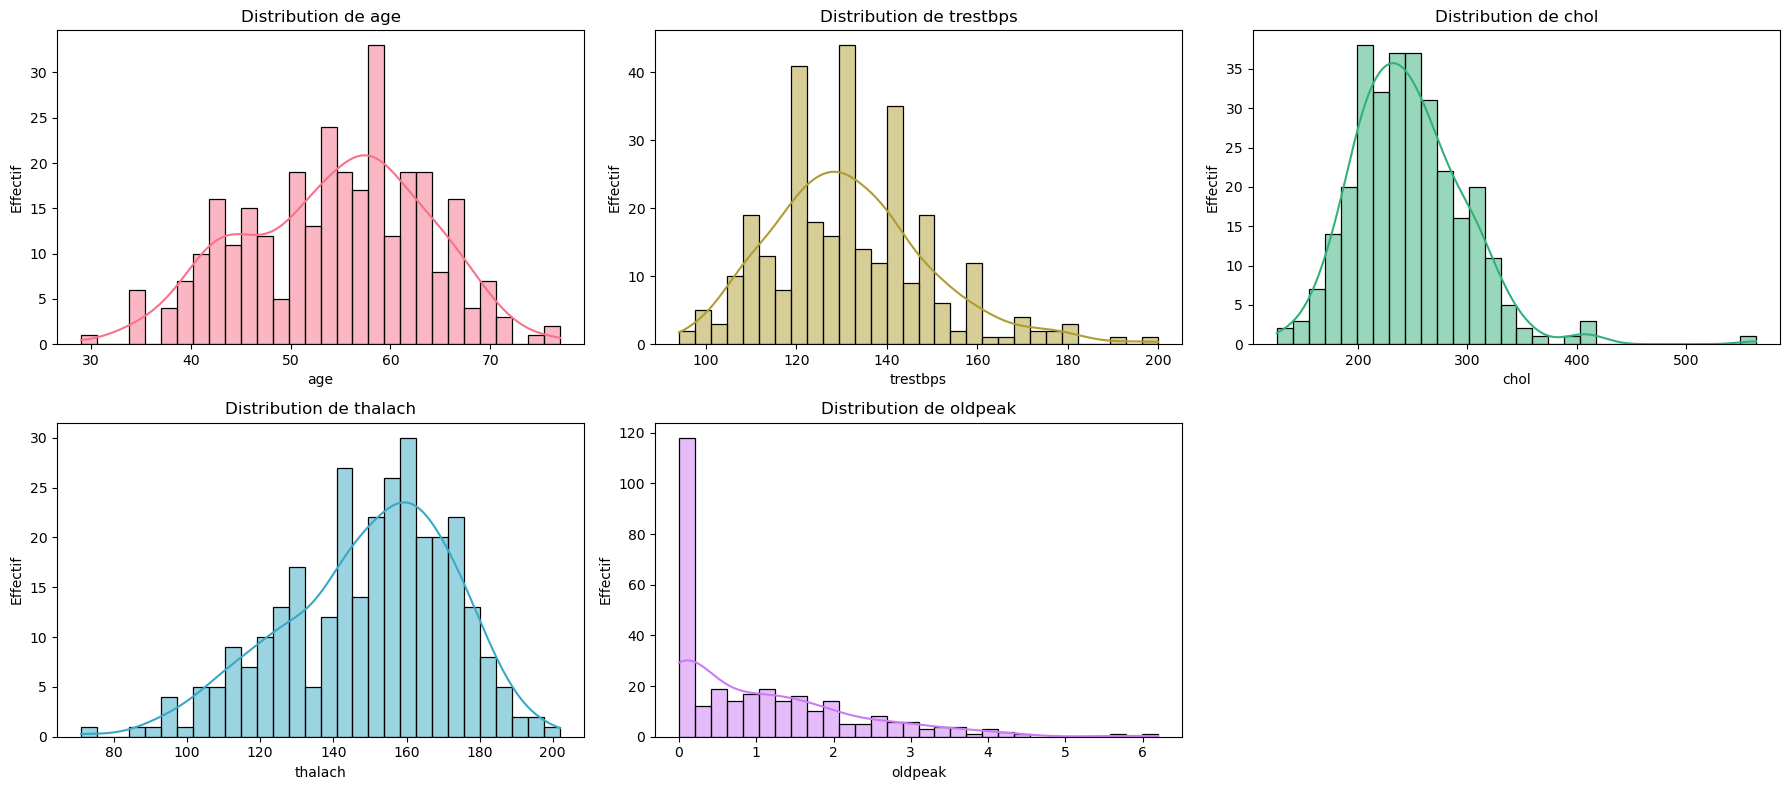

In [83]:
# Liste des variables numériques
num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Générer une palette de couleurs
colors = sns.color_palette("husl", len(num_vars))

# Initialiser la figure
fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2 lignes, 3 colonnes
axes = axes.flatten()  # Pour itérer facilement

# Boucle pour chaque variable
for i, var in enumerate(num_vars):
    sns.histplot(df[var], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Effectif')

# Supprimer le dernier subplot vide s’il y a moins de 6 variables
if len(num_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



**Interprètation : Nos variables suivent plus ou moins une distribution normale sauf notre variable oldpeak**

### **3-b :  Variables qualitatives ou catégorielles**

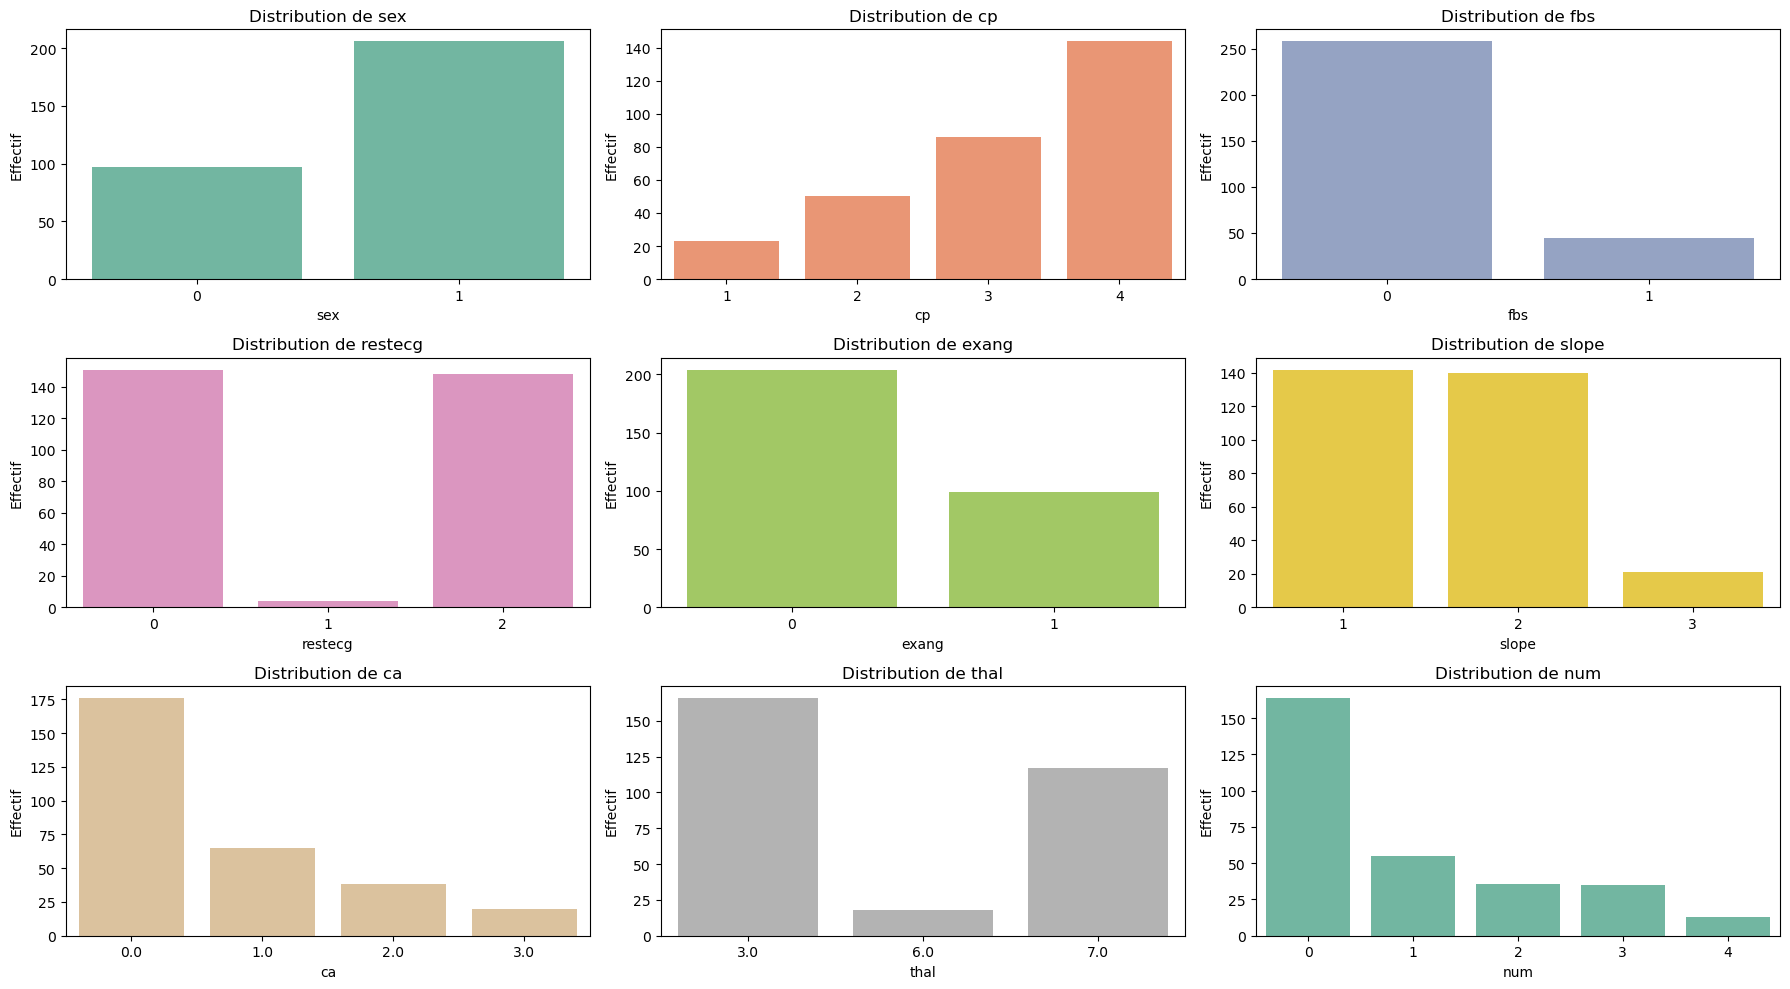

In [84]:
# Liste des variables catégorielles ou discrètes
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

# Palette de couleurs différentes
colors = sns.color_palette("Set2", len(cat_vars))

# Initialiser la figure avec subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

# Boucle avec couleur spécifique par variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Effectif')

# Supprimer les axes vides s’il y en a
if len(cat_vars) < len(axes):
    for j in range(len(cat_vars), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **3-C : Boxplots croisés avec notre OUTCOME**

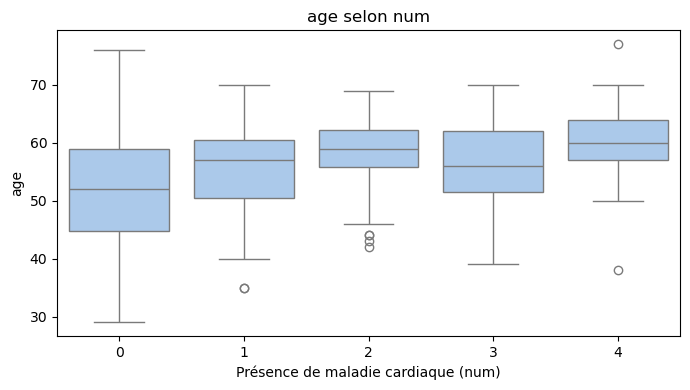

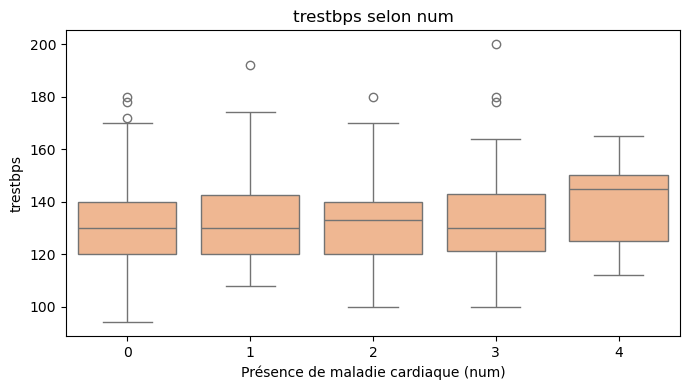

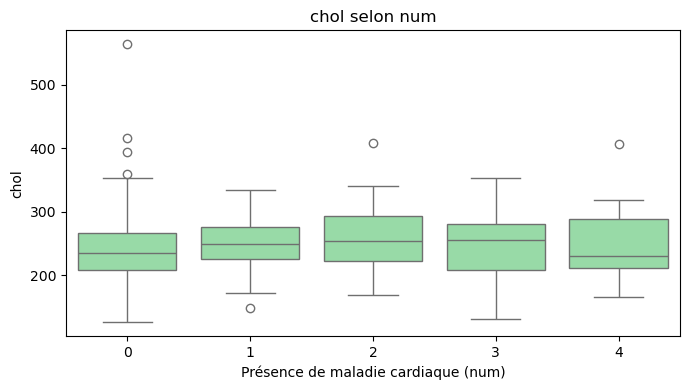

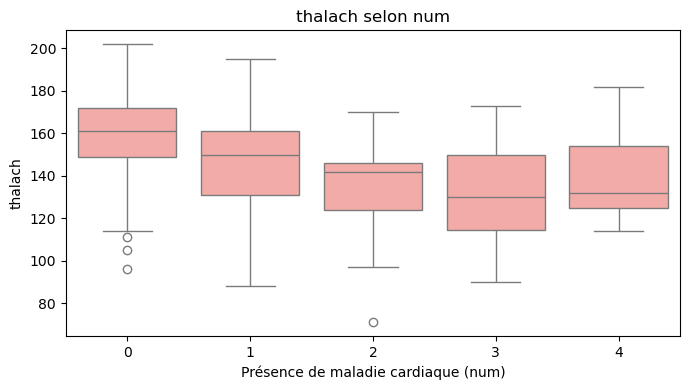

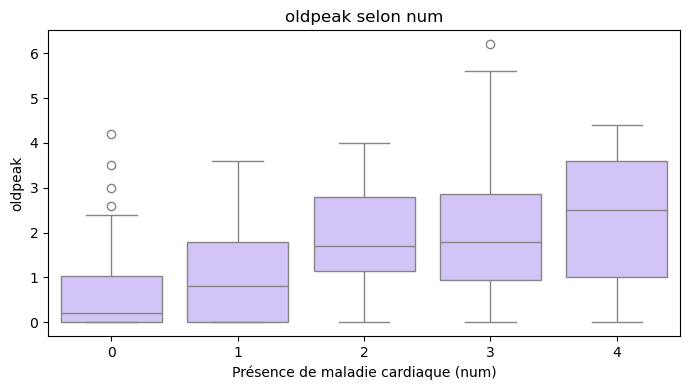

In [85]:
# Liste des variables numériques continues (axe Y)
num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Outcome (axe X)
outcome = 'num'

# Palette de couleurs harmonieuse
colors = sns.color_palette("pastel", len(num_vars))

# Générer les boxplots croisés
for i, var in enumerate(num_vars):
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=outcome, y=var, data=df, color=colors[i])
    plt.title(f'{var} selon {outcome}')
    plt.xlabel('Présence de maladie cardiaque (num)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


**Interprètation AGE** : 
Médiane plus faible pour num = 0	Les patients sans maladie cardiaque (num = 0) semblent être en moyenne plus jeunes.
Groupes num = 1 à 4	Les malades ont des âges plus élevés en général, avec une médiane plus haute et plus resserrée.
Variabilité plus grande pour num = 0	Le groupe sans maladie montre une plus grande dispersion (beaucoup plus de jeunes patients).
Présence d’outliers	Dans chaque groupe, surtout num = 2, on observe des points atypiques (outliers).
**Conclusion : L’âge semble lié à la présence de maladie cardiaque, avec une tendance logique, Plus l’âge augmente, plus le risque augmente**.


### **faire de même pour les autres**

### **3-D: HEATMAP**

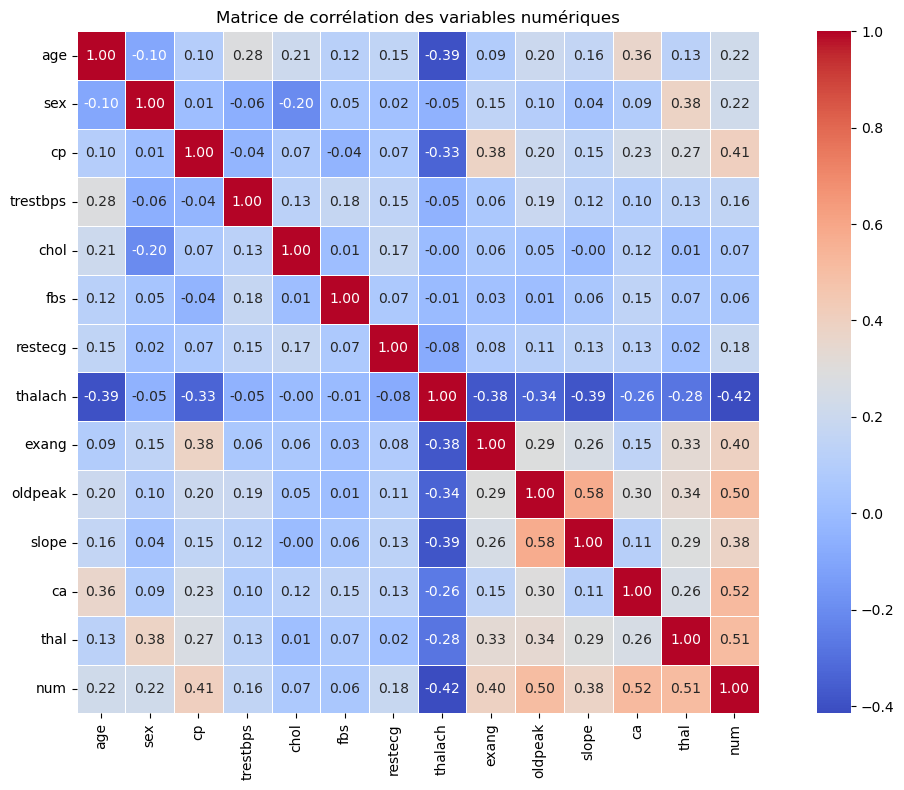

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    linewidths=0.5
)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()


**Interprètation**

### **Étape 3 : Data Preparation**

### **0- Transform my outcome in binary**

In [87]:
# Transformer la cible : 0 reste 0, toutes les autres valeurs deviennent 1
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

# Vérification
print(df['num'].value_counts())

num
0    164
1    139
Name: count, dtype: int64


### **1- Management Nan**

In [88]:
# Calcul du nombre et du pourcentage de valeurs manquantes
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Regrouper dans un DataFrame pour affichage clair
missing_report = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

# Filtrer uniquement les colonnes qui ont des valeurs manquantes
missing_report = missing_report[missing_report['Missing Count'] > 0]

# Afficher
print(missing_report)


      Missing Count  Missing %
ca                4       1.32
thal              2       0.66


In [89]:
# 1. Remplacer les valeurs manquantes par la médiane (pour ca et thal uniquement)
cols_to_impute = ['ca', 'thal']

for col in cols_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 2. Supprimer les lignes dupliquées
df.drop_duplicates(inplace=True)

# Vérification
print(f"Valeurs manquantes restantes :\n{df[cols_to_impute].isnull().sum()}")
print(f"Nombre de lignes après suppression des doublons : {df.shape[0]}")


Valeurs manquantes restantes :
ca      0
thal    0
dtype: int64
Nombre de lignes après suppression des doublons : 303


### **2- Préparation du modèle**

In [90]:
# 1. Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns='num')   # Toutes les colonnes sauf 'num'
y = df['num']                # La cible : présence de maladie cardiaque

# 2. Diviser les données en train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test  : {X_test.shape}, y_test  : {y_test.shape}")

X_train : (242, 13), y_train : (242,)
X_test  : (61, 13), y_test  : (61,)


In [91]:
y

patients
0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

## **Étape 4 : MODELING**

#### **1) MODELS SELECTION**

**CLASSIFICATION MODELS : NB (Naives BAYES)**

## **REGRESSION LOGISTIQUE**

In [92]:
# Entrainement du modèle
classifierlogreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear',random_state = 0)
classifierlogreg.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [93]:
# Prédictions (corrigées)
y_pred_train = classifierlogreg.predict(X_train)
y_prob_train =classifierlogreg.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
Accuracy_Rate = accuracy_score(y_train, y_pred_train)
Error_rate = 1 - Accuracy_Rate
F1_score_logreg = f1_score(y_train, y_pred_train)
CK = cohen_kappa_score(y_train, y_pred_train)
MC = matthews_corrcoef(y_train, y_pred_train)
AUC = roc_auc_score(y_train, y_prob_train)

# 3. Affichage
print("✅ Évaluation du modèle de régression logistique (jeu d'entraînement) :\n")
print(f"Precision      : {precision:.3f}")
print(f"Recall         : {recall:.3f}")
print(f"Accuracy       : {Accuracy_Rate:.3f}")
print(f"Error Rate     : {Error_rate:.3f}")
print(f"F1 Score       : {F1_score_logreg:.3f}")
print(f"Cohen's Kappa  : {CK:.3f}")
print(f"Matthews Corr. : {MC:.3f}")
print(f"AUC            : {AUC:.3f}")

✅ Évaluation du modèle de régression logistique (jeu d'entraînement) :

Precision      : 0.830
Recall         : 0.793
Accuracy       : 0.831
Error Rate     : 0.169
F1 Score       : 0.811
Cohen's Kappa  : 0.658
Matthews Corr. : 0.658
AUC            : 0.890


**Métrique | Valeur | Formule | Interprétation** 

Précision | 0.830 | TP / (TP + FP) | Parmi les cas prédits positifs, 83.0 % sont corrects (peu de faux positifs).

Recall (Rappel) | 0.793 | TP / (TP + FN) | Le modèle a détecté 79.3 % des vrais cas positifs (peu de faux négatifs).

Accuracy | 0.831 | (TP + TN) / Total | 83.1 % des prédictions totales sont correctes.

Error Rate | 0.169 | 1 - Accuracy | 16.9 % des prédictions sont erronées.

F1 Score | 0.811 | 2 * (precision * recall) / (precision + recall) | Équilibre entre précision et rappel.

Cohen’s Kappa | 0.658 | Accord observé vs aléatoire | Indique un accord modéré à bon entre prédictions et réalité.

MCC (Corr. Matthews) | 0.658 | Basé sur TP, TN, FP, FN | Corrélation équilibrée entre vraies/faux positifs/négatifs (robuste au déséquilibre).

AUC (ROC) | 0.890 | Aire sous la courbe ROC | 89.0 % de chances que le modèle classe un positif avant un négatif (excellent).

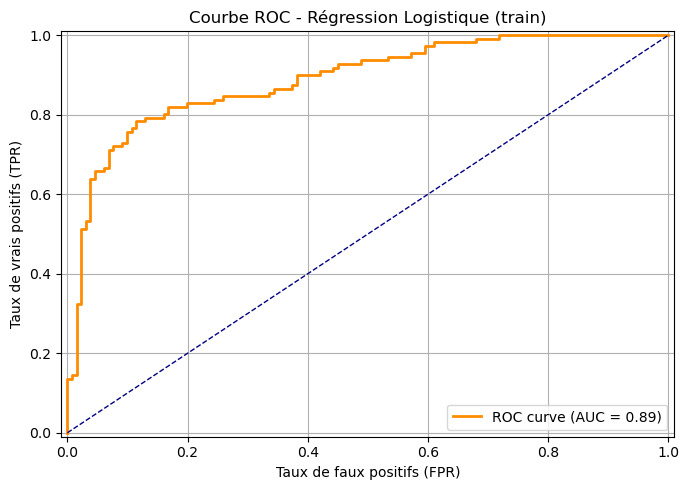

In [94]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


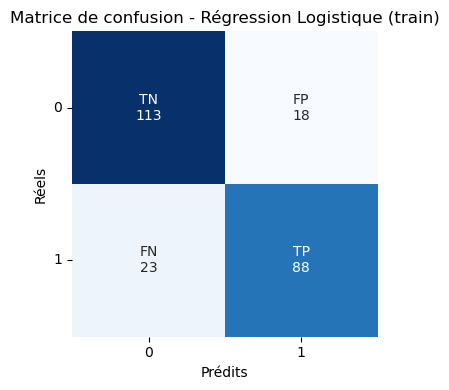

In [95]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_train, y_pred_train)

# Définition des étiquettes : TP, FP, FN, TN
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Création de l’annotation personnalisée
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm[i, j]}"

# Affichage avec seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - Régression Logistique (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()

## **SUPPORT VECTOR MACHINES (SVM)**

In [96]:
# Entrainement du modèle
classifier2 = SVC(kernel='linear', C=0.01, gamma='scale', random_state=0, probability=True)
classifier2.fit(X_train, y_train)


SVC(C=0.01, kernel='linear', probability=True, random_state=0)

In [97]:
# 1. Prédictions sur le jeu d'entraînement
y_pred_train_svm = classifier2.predict(X_train)
y_prob_train_svm = classifier2.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision_svm = precision_score(y_train, y_pred_train_svm)
recall_svm = recall_score(y_train, y_pred_train_svm)
accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
error_rate_svm = 1 - accuracy_svm
f1_score_svm = f1_score(y_train, y_pred_train_svm)
ck_svm = cohen_kappa_score(y_train, y_pred_train_svm)
mc_svm = matthews_corrcoef(y_train, y_pred_train_svm)
auc_svm = roc_auc_score(y_train, y_prob_train_svm)

# 3. Affichage des métriques
print("✅ Évaluation du modèle Support Vector Machine (SVM) sur le jeu d'entraînement :\n")
print(f"Precision        : {precision_svm:.3f}")
print(f"Recall           : {recall_svm:.3f}")
print(f"Accuracy         : {accuracy_svm:.3f}")
print(f"Error Rate       : {error_rate_svm:.3f}")
print(f"F1 Score         : {f1_score_svm:.3f}")
print(f"Cohen's Kappa    : {ck_svm:.3f}")
print(f"Matthews Corrcoef: {mc_svm:.3f}")
print(f"AUC              : {auc_svm:.3f}")


✅ Évaluation du modèle Support Vector Machine (SVM) sur le jeu d'entraînement :

Precision        : 0.811
Recall           : 0.775
Accuracy         : 0.814
Error Rate       : 0.186
F1 Score         : 0.793
Cohen's Kappa    : 0.624
Matthews Corrcoef: 0.625
AUC              : 0.890


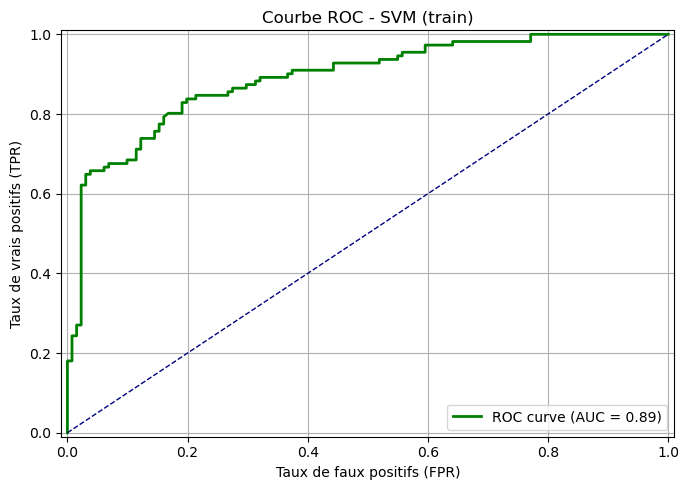

In [98]:
# Calcul pour la courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_prob_train_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - SVM (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

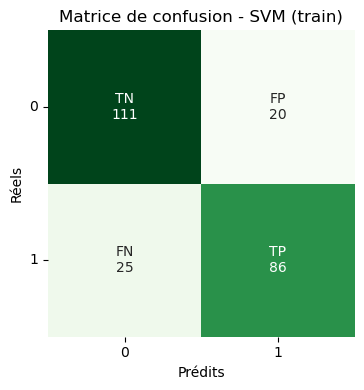

In [99]:
# Calcul de la matrice de confusion
cm_svm = confusion_matrix(y_train, y_pred_train_svm)

# Définition des étiquettes : TP, FP, FN, TN
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Création de l’annotation personnalisée
annot = np.empty_like(cm_svm).astype(str)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm_svm[i, j]}"

# Affichage avec une couleur différente (par exemple "Greens" pour SVM)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=annot, fmt='', cmap='Greens', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - SVM (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()

## **RANDOM FOREST**

In [100]:
# Entrainement du modèle
classifier3 = RandomForestClassifier(
    n_estimators=100,    # Nombre d'arbres
    criterion='gini',    # Critère de séparation
    max_depth=None,      # Profondeur des arbres (None = pas de limite)
    random_state=0
)
classifier3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [101]:
# 1. Prédictions sur le jeu d'entraînement
y_pred_train_rf = classifier3.predict(X_train)
y_prob_train_rf = classifier3.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision_rf = precision_score(y_train, y_pred_train_rf)
recall_rf = recall_score(y_train, y_pred_train_rf)
accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
error_rate_rf = 1 - accuracy_rf
f1_score_rf = f1_score(y_train, y_pred_train_rf)
ck_rf = cohen_kappa_score(y_train, y_pred_train_rf)
mc_rf = matthews_corrcoef(y_train, y_pred_train_rf)
auc_rf = roc_auc_score(y_train, y_prob_train_rf)

# 3. Affichage des métriques
print("✅ Évaluation du modèle Random Forest sur le jeu d'entraînement :\n")
print(f"Precision        : {precision_rf:.3f}")
print(f"Recall           : {recall_rf:.3f}")
print(f"Accuracy         : {accuracy_rf:.3f}")
print(f"Error Rate       : {error_rate_rf:.3f}")
print(f"F1 Score         : {f1_score_rf:.3f}")
print(f"Cohen's Kappa    : {ck_rf:.3f}")
print(f"Matthews Corrcoef: {mc_rf:.3f}")
print(f"AUC              : {auc_rf:.3f}")


✅ Évaluation du modèle Random Forest sur le jeu d'entraînement :

Precision        : 1.000
Recall           : 1.000
Accuracy         : 1.000
Error Rate       : 0.000
F1 Score         : 1.000
Cohen's Kappa    : 1.000
Matthews Corrcoef: 1.000
AUC              : 1.000


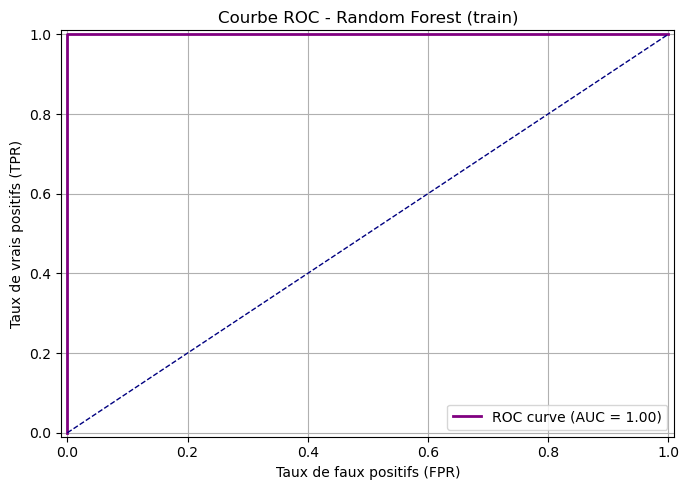

In [102]:
# Calcul pour la courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_prob_train_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


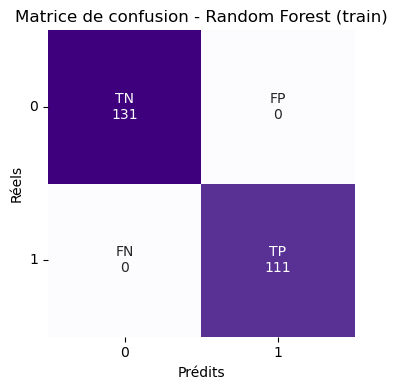

In [103]:
# Calcul de la matrice de confusion
cm_rf = confusion_matrix(y_train, y_pred_train_rf)

# Définir les étiquettes
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Annotation personnalisée
annot = np.empty_like(cm_rf).astype(str)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm_rf[i, j]}"

# Affichage avec une nouvelle couleur (par exemple "Purples" pour Random Forest)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=annot, fmt='', cmap='Purples', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - Random Forest (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()

## **XGBoost**

In [104]:
# Entrainement du modèle XGBoost
classifier4 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',  # Important pour éviter un warning
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=0
)
classifier4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [105]:
# 1. Prédictions sur le jeu d'entraînement
y_pred_train_xgb = classifier4.predict(X_train)
y_prob_train_xgb = classifier4.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision_xgb = precision_score(y_train, y_pred_train_xgb)
recall_xgb = recall_score(y_train, y_pred_train_xgb)
accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
error_rate_xgb = 1 - accuracy_xgb
f1_score_xgb = f1_score(y_train, y_pred_train_xgb)
ck_xgb = cohen_kappa_score(y_train, y_pred_train_xgb)
mc_xgb = matthews_corrcoef(y_train, y_pred_train_xgb)
auc_xgb = roc_auc_score(y_train, y_prob_train_xgb)

# 3. Affichage des métriques
print("✅ Évaluation du modèle XGBoost sur le jeu d'entraînement :\n")
print(f"Precision        : {precision_xgb:.3f}")
print(f"Recall           : {recall_xgb:.3f}")
print(f"Accuracy         : {accuracy_xgb:.3f}")
print(f"Error Rate       : {error_rate_xgb:.3f}")
print(f"F1 Score         : {f1_score_xgb:.3f}")
print(f"Cohen's Kappa    : {ck_xgb:.3f}")
print(f"Matthews Corrcoef: {mc_xgb:.3f}")
print(f"AUC              : {auc_xgb:.3f}")


✅ Évaluation du modèle XGBoost sur le jeu d'entraînement :

Precision        : 0.991
Recall           : 0.991
Accuracy         : 0.992
Error Rate       : 0.008
F1 Score         : 0.991
Cohen's Kappa    : 0.983
Matthews Corrcoef: 0.983
AUC              : 0.999


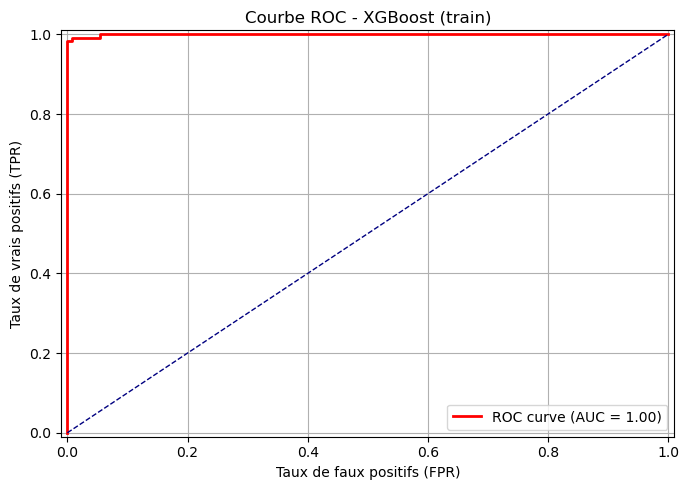

In [106]:
# Calcul pour la courbe ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_prob_train_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - XGBoost (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


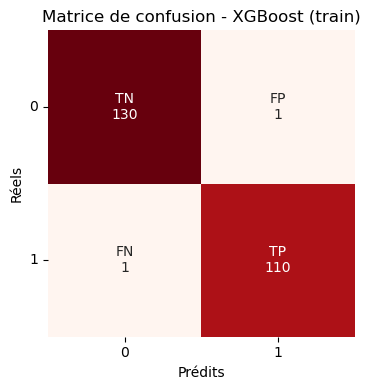

In [107]:
# Calcul de la matrice de confusion
cm_xgb = confusion_matrix(y_train, y_pred_train_xgb)

# Définir les étiquettes
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Annotation personnalisée
annot = np.empty_like(cm_xgb).astype(str)
for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm_xgb[i, j]}"

# Affichage avec une couleur différente (par exemple "Reds" pour XGBoost)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=annot, fmt='', cmap='Reds', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - XGBoost (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()


## **KNN (K-Nearest Neighbors)**

In [108]:
# Entrainement du modèle KNN
classifier5 = KNeighborsClassifier(
    n_neighbors=5,    # Nombre de voisins
    metric='minkowski',  # Distance utilisée
    p=2                # p=2 => distance euclidienne
)
classifier5.fit(X_train, y_train)


KNeighborsClassifier()

In [109]:
# 1. Prédictions sur le jeu d'entraînement
y_pred_train_knn = classifier5.predict(X_train)
y_prob_train_knn = classifier5.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision_knn = precision_score(y_train, y_pred_train_knn)
recall_knn = recall_score(y_train, y_pred_train_knn)
accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
error_rate_knn = 1 - accuracy_knn
f1_score_knn = f1_score(y_train, y_pred_train_knn)
ck_knn = cohen_kappa_score(y_train, y_pred_train_knn)
mc_knn = matthews_corrcoef(y_train, y_pred_train_knn)
auc_knn = roc_auc_score(y_train, y_prob_train_knn)

# 3. Affichage des métriques
print("✅ Évaluation du modèle KNN sur le jeu d'entraînement :\n")
print(f"Precision        : {precision_knn:.3f}")
print(f"Recall           : {recall_knn:.3f}")
print(f"Accuracy         : {accuracy_knn:.3f}")
print(f"Error Rate       : {error_rate_knn:.3f}")
print(f"F1 Score         : {f1_score_knn:.3f}")
print(f"Cohen's Kappa    : {ck_knn:.3f}")
print(f"Matthews Corrcoef: {mc_knn:.3f}")
print(f"AUC              : {auc_knn:.3f}")


✅ Évaluation du modèle KNN sur le jeu d'entraînement :

Precision        : 0.750
Recall           : 0.703
Accuracy         : 0.756
Error Rate       : 0.244
F1 Score         : 0.726
Cohen's Kappa    : 0.507
Matthews Corrcoef: 0.508
AUC              : 0.833


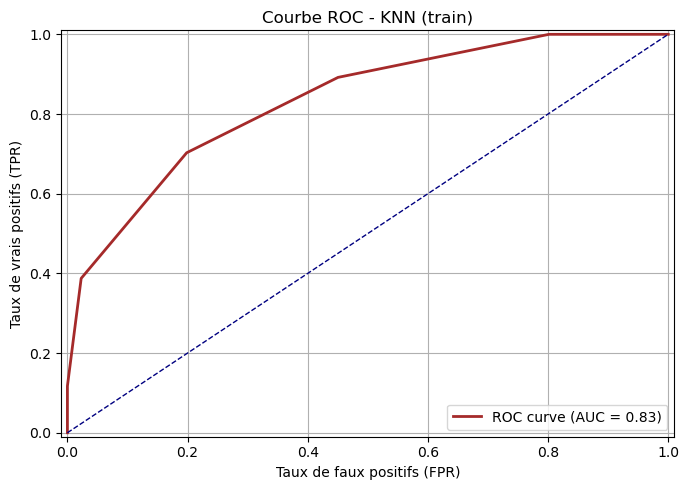

In [110]:
# Calcul pour la courbe ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_prob_train_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - KNN (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


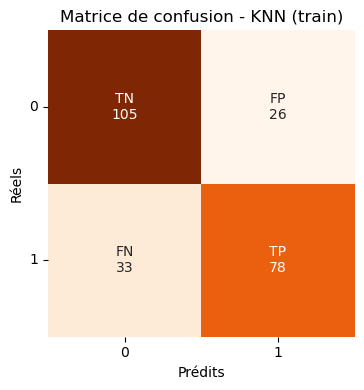

In [111]:
# Calcul de la matrice de confusion
cm_knn = confusion_matrix(y_train, y_pred_train_knn)

# Définir les étiquettes
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Annotation personnalisée
annot = np.empty_like(cm_knn).astype(str)
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm_knn[i, j]}"

# Affichage avec une nouvelle couleur (par exemple "Oranges" pour KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=annot, fmt='', cmap='Oranges', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - KNN (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()


## **Naives BAYES**

In [116]:
# Entrainement du modèle Naive Bayes avec arguments
classifier6 = GaussianNB(
    priors=None,        # Laisser sklearn estimer à partir des données
    var_smoothing=1e-9  # Smoothing numérique pour stabilité
)
classifier6.fit(X_train, y_train)


GaussianNB()

In [117]:
# 1. Prédictions sur le jeu d'entraînement
y_pred_train_nb = classifier6.predict(X_train)
y_prob_train_nb = classifier6.predict_proba(X_train)[:, 1]

# 2. Calcul des métriques
precision_nb = precision_score(y_train, y_pred_train_nb)
recall_nb = recall_score(y_train, y_pred_train_nb)
accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
error_rate_nb = 1 - accuracy_nb
f1_score_nb = f1_score(y_train, y_pred_train_nb)
ck_nb = cohen_kappa_score(y_train, y_pred_train_nb)
mc_nb = matthews_corrcoef(y_train, y_pred_train_nb)
auc_nb = roc_auc_score(y_train, y_prob_train_nb)

# 3. Affichage des métriques
print("✅ Évaluation du modèle Naive Bayes sur le jeu d'entraînement :\n")
print(f"Precision        : {precision_nb:.3f}")
print(f"Recall           : {recall_nb:.3f}")
print(f"Accuracy         : {accuracy_nb:.3f}")
print(f"Error Rate       : {error_rate_nb:.3f}")
print(f"F1 Score         : {f1_score_nb:.3f}")
print(f"Cohen's Kappa    : {ck_nb:.3f}")
print(f"Matthews Corrcoef: {mc_nb:.3f}")
print(f"AUC              : {auc_nb:.3f}")

✅ Évaluation du modèle Naive Bayes sur le jeu d'entraînement :

Precision        : 0.871
Recall           : 0.793
Accuracy         : 0.851
Error Rate       : 0.149
F1 Score         : 0.830
Cohen's Kappa    : 0.698
Matthews Corrcoef: 0.701
AUC              : 0.902


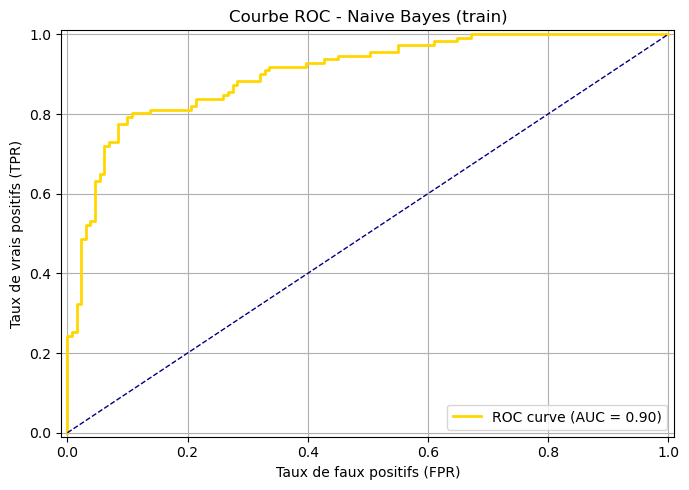

In [118]:
# Calcul pour la courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train, y_prob_train_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_nb, tpr_nb, color='gold', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Naive Bayes (train)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

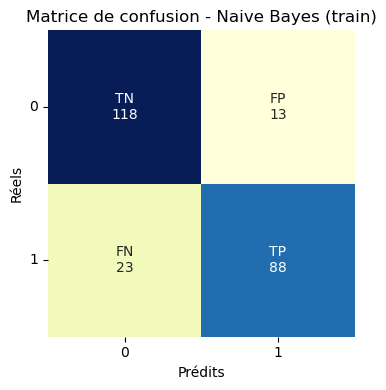

In [119]:
# Calcul de la matrice de confusion
cm_nb = confusion_matrix(y_train, y_pred_train_nb)

# Définir les étiquettes
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Annotation personnalisée
annot = np.empty_like(cm_nb).astype(str)
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        annot[i, j] = f"{labels[i, j]}\n{cm_nb[i, j]}"

# Affichage avec une nouvelle couleur (par exemple "YlGnBu" pour Naive Bayes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=annot, fmt='', cmap='YlGnBu', cbar=False, square=True)
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - Naive Bayes (train)')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)
plt.tight_layout()
plt.show()

### **METRICS OF THE MODELS**

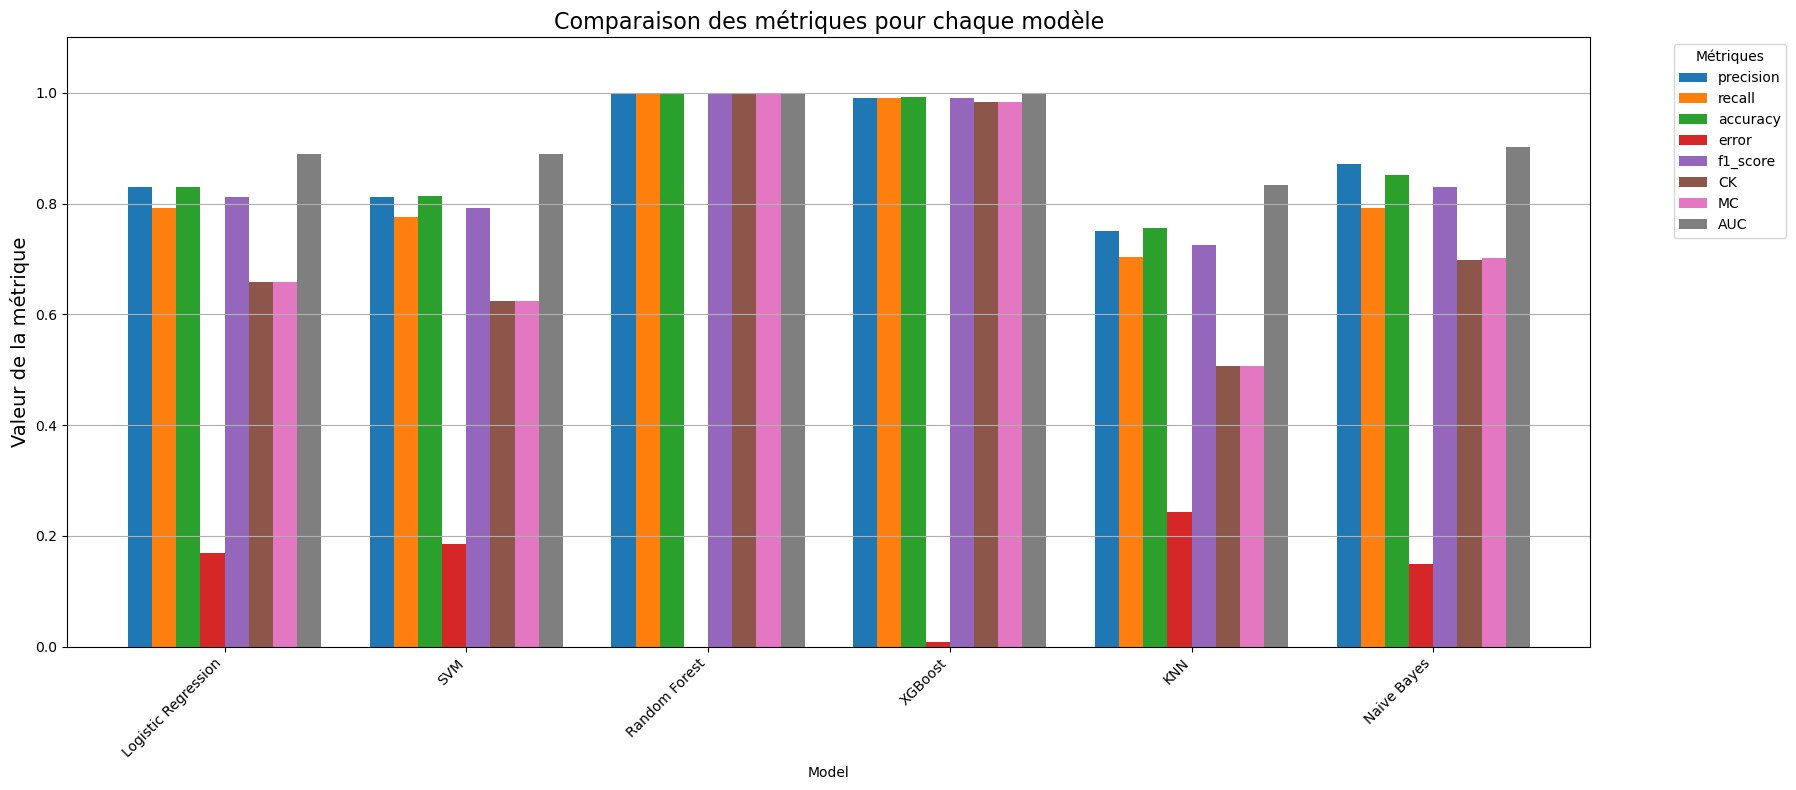

In [121]:
# 1. Regrouper toutes les métriques dans un DataFrame
metrics_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'KNN', 'Naive Bayes'
    ],
    'precision': [
        precision, precision_svm, precision_rf, precision_xgb, precision_knn, precision_nb
    ],
    'recall': [
        recall, recall_svm, recall_rf, recall_xgb, recall_knn, recall_nb
    ],
    'accuracy': [
        Accuracy_Rate, accuracy_svm, accuracy_rf, accuracy_xgb, accuracy_knn, accuracy_nb
    ],
    'error': [
        1-Accuracy_Rate, 1-accuracy_svm, 1-accuracy_rf, 1-accuracy_xgb, 1-accuracy_knn, 1-accuracy_nb
    ],
    'f1_score': [
        F1_score_logreg, f1_score_svm, f1_score_rf, f1_score_xgb, f1_score_knn, f1_score_nb
    ],
    'CK': [
        CK, ck_svm, ck_rf, ck_xgb, ck_knn, ck_nb
    ],
    'MC': [
        MC, mc_svm, mc_rf, mc_xgb, mc_knn, mc_nb
    ],
    'AUC': [
        AUC, auc_svm, auc_rf, auc_xgb, auc_knn, auc_nb
    ]
})

# 2. Plot Grouped Bar Chart
metrics_comparison.set_index('Model', inplace=True)

# Définir la taille
fig, ax = plt.subplots(figsize=(18, 8))

# Tracer les barres groupées
metrics_comparison.plot(kind='bar', ax=ax, width=0.8)

# Paramètres de style
plt.title('Comparaison des métriques pour chaque modèle', fontsize=16)
plt.ylabel('Valeur de la métrique', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Métriques', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Afficher
plt.show()


**Interprètation : Le ranking des modèles : RF, XGB, NB, RL, SVM, KNN selon les accuracy** 

### **AUC OF THE MODELS**

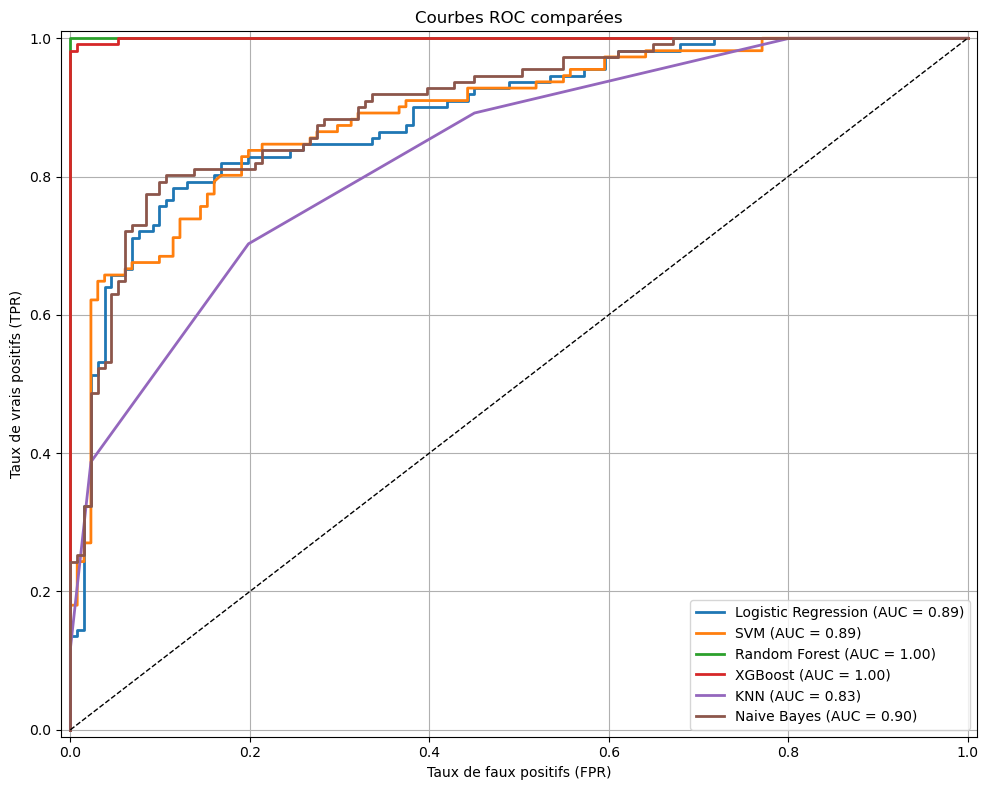

In [122]:
plt.figure(figsize=(10, 8))

# Tracer les courbes ROC pour chaque modèle
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {AUC:.2f})', lw=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', lw=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', lw=2)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', lw=2)

# Ligne de base
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Paramètres
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC comparées')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()


### **MATRIX CONFUSION OF THE MODELS**

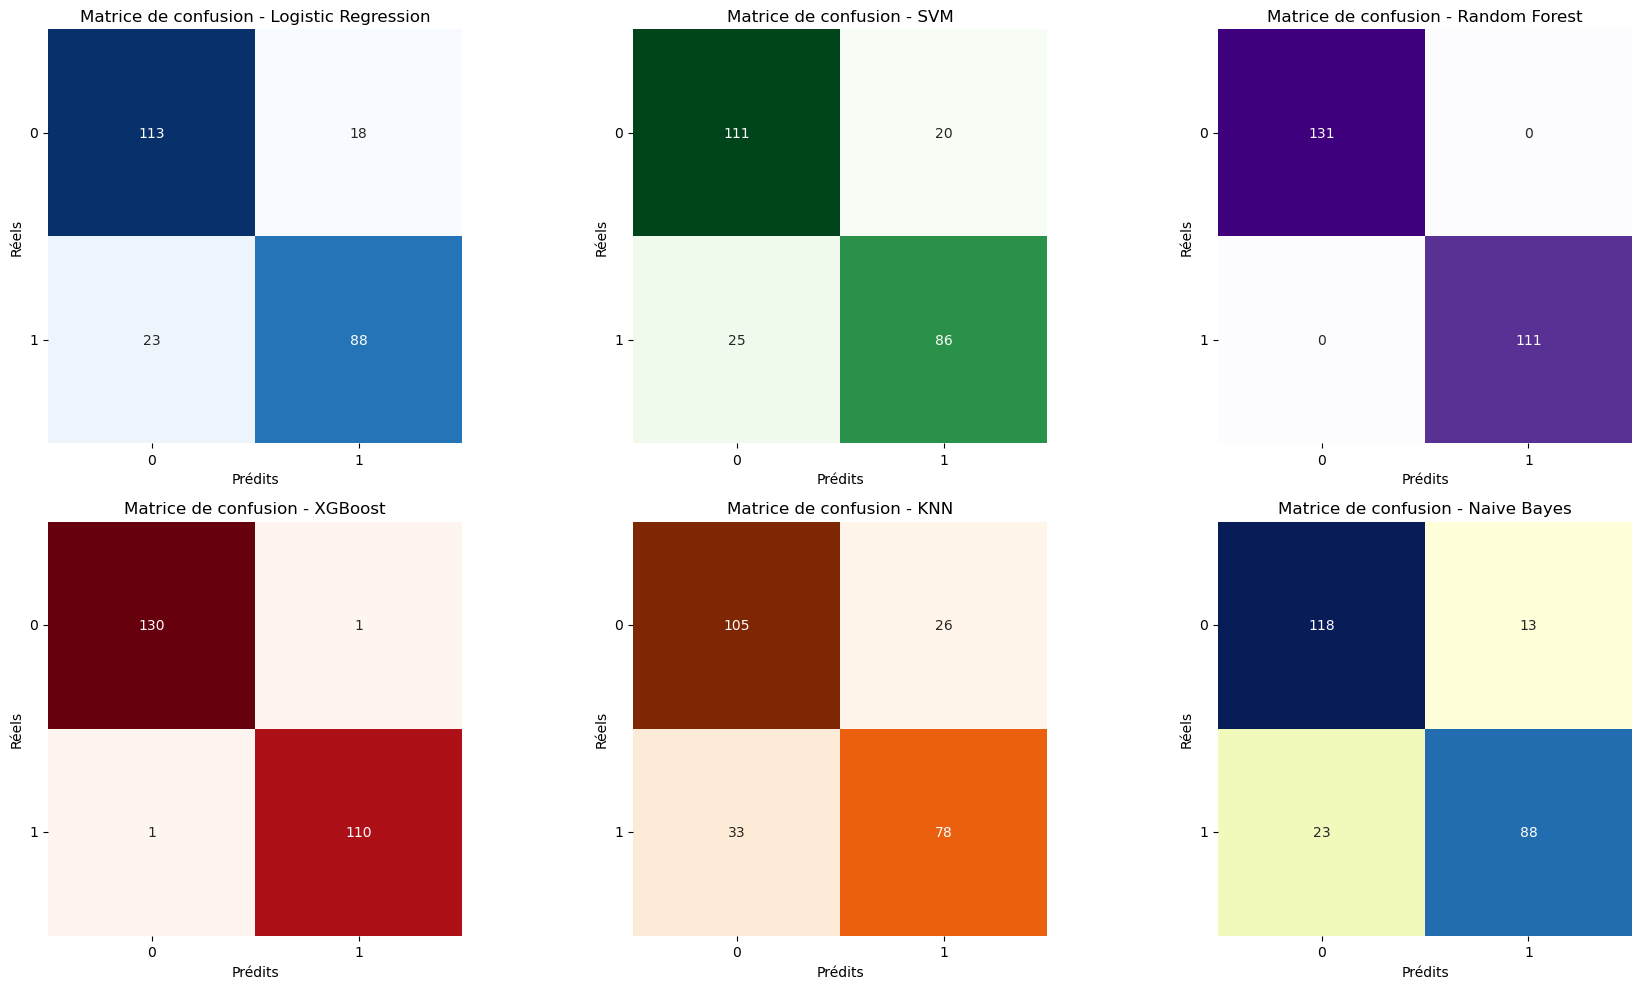

In [123]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Dictionnaire pour tout organiser
conf_matrices = {
    'Logistic Regression': cm,
    'SVM': cm_svm,
    'Random Forest': cm_rf,
    'XGBoost': cm_xgb,
    'KNN': cm_knn,
    'Naive Bayes': cm_nb
}

# Couleurs différentes pour chaque modèle
colors = ['Blues', 'Greens', 'Purples', 'Reds', 'Oranges', 'YlGnBu']

# Boucle sur chaque matrice
for idx, (model_name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(
        matrix, annot=True, fmt='d', cmap=colors[idx],
        cbar=False, ax=axes[idx], square=True
    )
    axes[idx].set_title(f'Matrice de confusion - {model_name}')
    axes[idx].set_xlabel('Prédits')
    axes[idx].set_ylabel('Réels')
    axes[idx].set_xticks([0.5, 1.5])
    axes[idx].set_xticklabels(['0', '1'])
    axes[idx].set_yticks([0.5, 1.5])
    axes[idx].set_yticklabels(['0', '1'], rotation=0)

plt.tight_layout()
plt.show()


### **BENEFICES NETS**

✅ Bénéfice net estimé pour chaque modèle :


,Net Benefit
Random Forest,3330000
XGBoost,3240000
Naive Bayes,1360000
Logistic Regression,1310000
SVM,1130000
KNN,430000


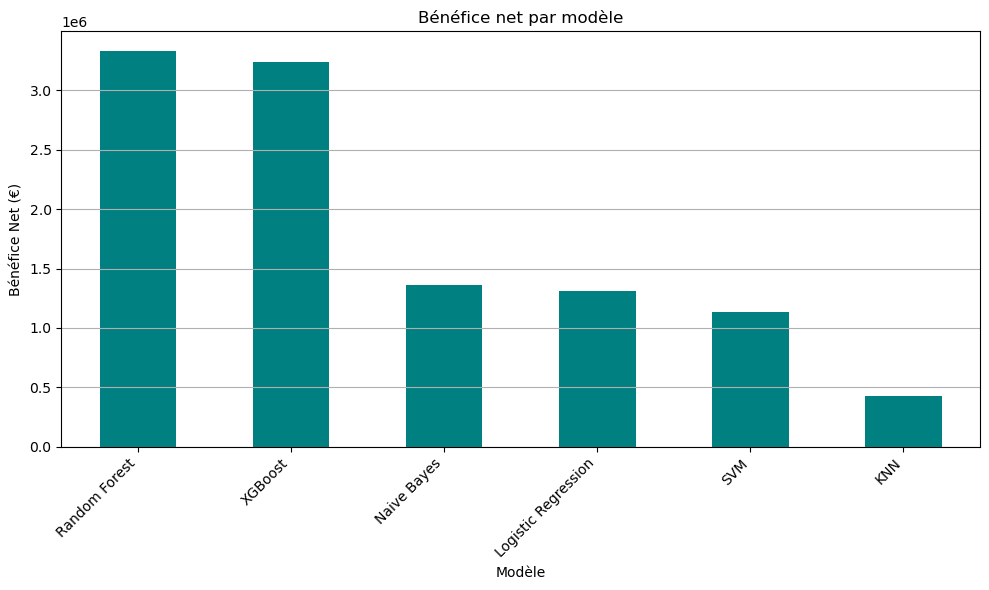

In [124]:
# Fonction pour extraire VP, FN, FP à partir d'une matrice de confusion
def calculate_net_benefit(cm):
    TN, FP, FN, TP = cm.ravel()
    net_benefit = (TP * 30000) - (FN * 50000) - (FP * 10000)
    return net_benefit

# Calcul du bénéfice net pour chaque modèle
benefits = {
    'Logistic Regression': calculate_net_benefit(cm),
    'SVM': calculate_net_benefit(cm_svm),
    'Random Forest': calculate_net_benefit(cm_rf),
    'XGBoost': calculate_net_benefit(cm_xgb),
    'KNN': calculate_net_benefit(cm_knn),
    'Naive Bayes': calculate_net_benefit(cm_nb)
}

# Convertir en DataFrame
benefits_df = pd.DataFrame.from_dict(benefits, orient='index', columns=['Net Benefit'])
benefits_df.sort_values(by='Net Benefit', ascending=False, inplace=True)

# Afficher le tableau
print("✅ Bénéfice net estimé pour chaque modèle :")
display(benefits_df)

# Tracer un barplot
plt.figure(figsize=(10, 6))
benefits_df['Net Benefit'].plot(kind='bar', color='teal')
plt.title('Bénéfice net par modèle')
plt.ylabel('Bénéfice Net (€)')
plt.xlabel('Modèle')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **Interpretation : Le modèle qui maximise les bénéfices nets c'est le RANDOM FOREST**

# **ETAPE 5 : MODEL EVALUATION**

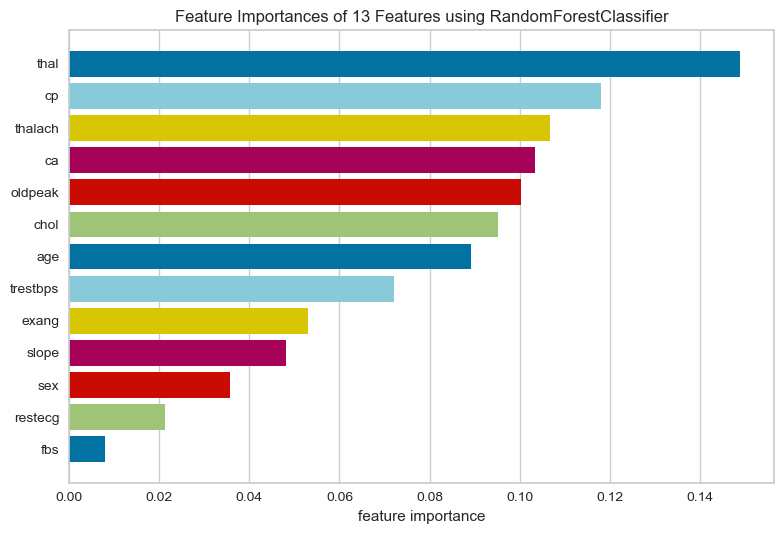

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [130]:
from yellowbrick.model_selection import FeatureImportances

# Attention : tous les modèles n'ont pas d'attribut "feature_importances_"
# RandomForest, XGBoost oui ; Logistic Regression non directement.
# On utilise RandomForest ici en exemple :

viz = FeatureImportances(classifier3, labels=X_train.columns, relative=False)
viz.fit(X_train, y_train)
viz.show()

### **Explication des prédictions :**

In [131]:
# Choisir un patient de l'ensemble de test
patient_id = 5  # Par exemple, le 6ᵉ patient dans X_test
patient = X_test.iloc[[patient_id]]

# Afficher ses données
print(patient)

          age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
patients                                                                        
244        60    0   3       120   178    1        0       96      0      0.0   

          slope   ca  thal  
patients                    
244           1  0.0   3.0  


In [133]:
# Prédiction et probabilité
predicted_class = classifier3.predict(patient)[0]  # Random Forest ici
predicted_proba = classifier3.predict_proba(patient)[0]

print(f"\n Prédiction pour le patient : {'Malade' if predicted_class == 1 else 'Non malade'}")
print(f"Probabilité d'être malade : {predicted_proba[1]:.2f}")
print(f"Probabilité d'être non malade : {predicted_proba[0]:.2f}")


 Prédiction pour le patient : Non malade
Probabilité d'être malade : 0.21
Probabilité d'être non malade : 0.79


## **DEPLOYMENT**

In [144]:
import streamlit as st

# Titre
st.title('🔍 Prédiction de Maladie Cardiaque')

# Message
st.write('Bienvenue sur votre première application Streamlit !')

# Exemple simple : bouton
if st.button('Dire Bonjour'):
    st.write('Bonjour médecin 👨‍⚕️👩‍⚕️!')


2025-04-26 19:41:36.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 19:41:36.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar